c:\Users\lix23\Desktop\CPD\tests_debug


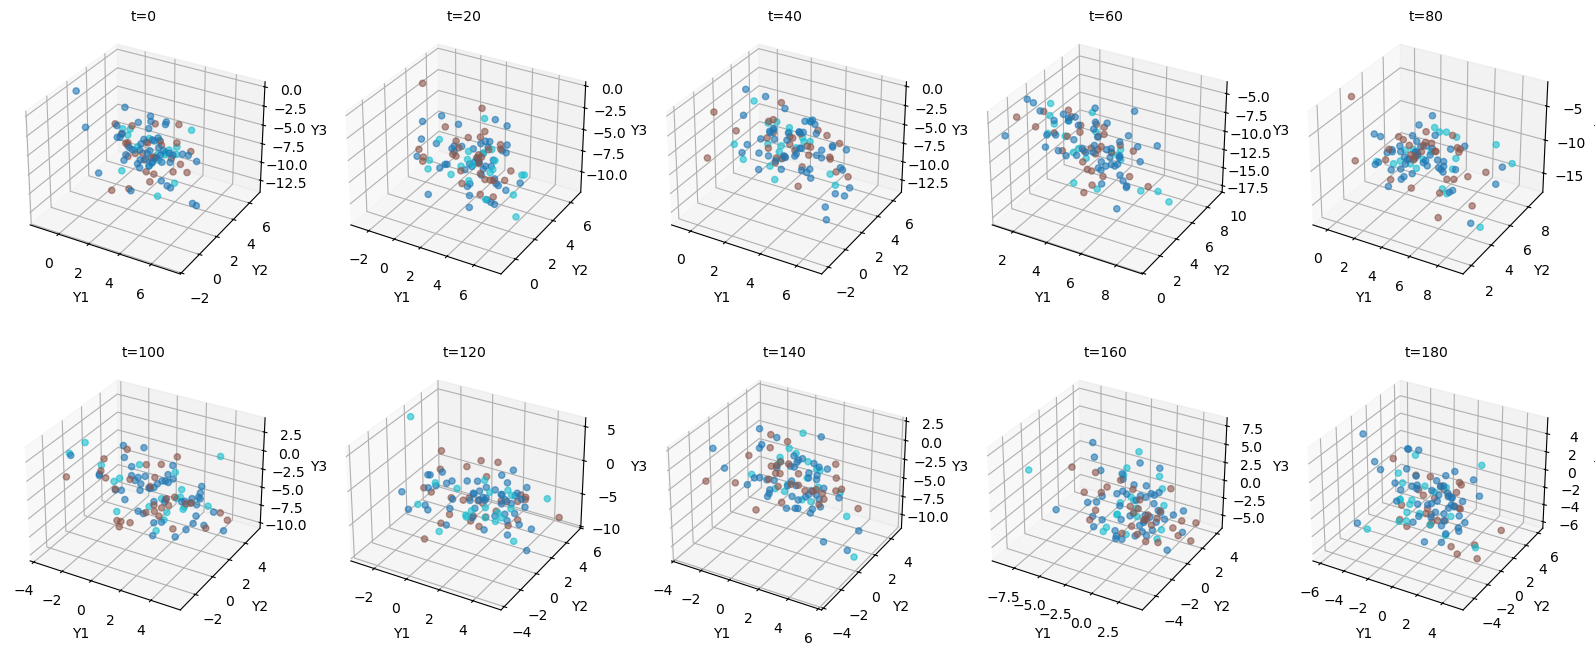

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

print(os.getcwd())
T, N, dy = 200, 100, 3
N1, N2, N3 = 50, 30, 20 

Y_all = pd.read_csv("C:/Users/lix23/Desktop/CPD/sims_py/reps_sim_dat/y_rep0.csv").values
y_seq = Y_all.reshape(T, N, dy)


labels = np.concatenate([
    np.zeros(N1, dtype=int),
    np.ones(N2, dtype=int),
    np.full(N3, 2, dtype=int)
])


colors = plt.cm.tab10(np.linspace(0, 1, len(np.unique(labels))))


time_points = np.arange(0, T, 20)   # 0,20,...,180
nplots = len(time_points)
ncols = 5
nrows = int(np.ceil(nplots/ncols))


fig = plt.figure(figsize=(4*ncols, 4*nrows))

for i, t in enumerate(time_points):
    ax = fig.add_subplot(nrows, ncols, i+1, projection='3d')

    for c in np.unique(labels):
        mask = (labels == c)
        xs, ys, zs = y_seq[t, mask, 0], y_seq[t, mask, 1], y_seq[t, mask, 2]
        ax.scatter(xs, ys, zs, color=colors[c], alpha=0.6, s=20)

    ax.set_title(f"t={t}", pad=1, fontsize=10)

    ax.set_xlabel("Y1")
    ax.set_ylabel("Y2")
    ax.set_zlabel("Y3")


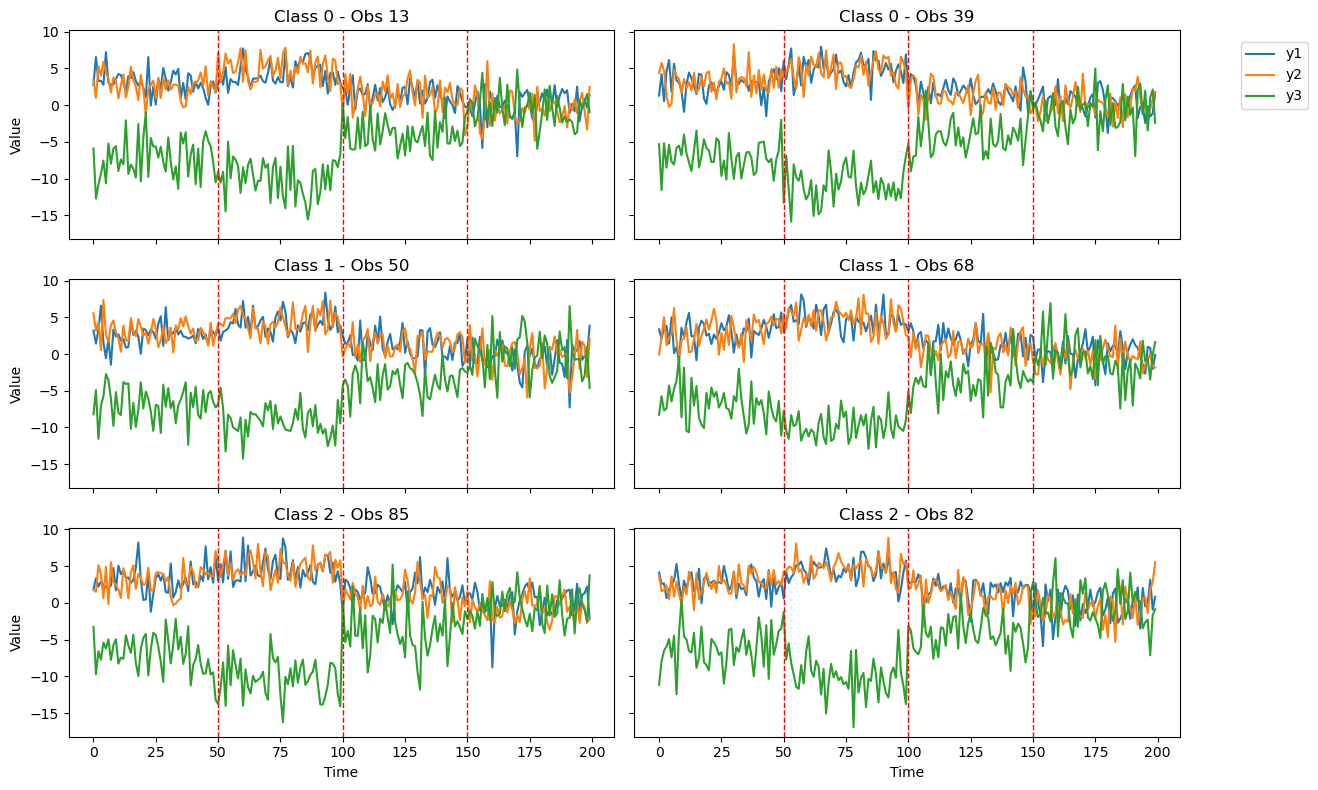

In [3]:
Y_all = y_seq
T, N, dy = Y_all.shape  # (200, 100, 3)
N1, N2, N3 = 50, 30, 20
labels = np.concatenate([
    np.zeros(N1, dtype=int),
    np.ones(N2, dtype=int),
    np.full(N3, 2, dtype=int)
])

np.random.seed(42)
chosen_idx = {c: np.random.choice(np.where(labels==c)[0], size=2, replace=False) 
              for c in np.unique(labels)}

colors_y = ['tab:blue', 'tab:orange', 'tab:green'] 
time = np.arange(T)
change_points = [50, 100, 150]

fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)

for row, c in enumerate(np.unique(labels)):
    for col, idx in enumerate(chosen_idx[c]):
        ax = axes[row, col]
        for j in range(dy):
            ax.plot(time, Y_all[:, idx, j], label=f"y{j+1}", color=colors_y[j])

        for cp in change_points:
            ax.axvline(cp, color="red", linestyle="--", linewidth=1)
        ax.set_title(f"Class {c} - Obs {idx}")
        if col == 0:
            ax.set_ylabel("Value")

for ax in axes[-1, :]:
    ax.set_xlabel("Time")

handles, labels_leg = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels_leg, loc="upper right", bbox_to_anchor=(1.1, 0.95))

plt.tight_layout()
plt.show()

In [ ]:
# Save GIF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

T, N, dy = y_seq.shape
N1, N2, N3 = 50, 30, 20
labels = np.concatenate([
    np.zeros(N1, dtype=int),
    np.ones(N2, dtype=int),
    np.full(N3, 2, dtype=int)
])

# Choose two samples per class
np.random.seed(42)
chosen_idx = {c: np.random.choice(np.where(labels==c)[0], size=2, replace=False) 
              for c in np.unique(labels)}
chosen_all = np.concatenate(list(chosen_idx.values()))

colors_y = ['tab:blue', 'tab:orange', 'tab:green']
change_points = [50, 100, 150]

fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)
lines = []

# Initialize all subplots
for row, c in enumerate(np.unique(labels)):
    for col, idx in enumerate(chosen_idx[c]):
        ax = axes[row, col]
        lns = []
        for j in range(dy):
            ln, = ax.plot([], [], color=colors_y[j], label=f"y{j+1}")
            lns.append(ln)
        for cp in change_points:
            ax.axvline(cp, color="red", linestyle="--", linewidth=1)
        ax.set_xlim(0, T)
        ax.set_ylim(np.min(Y_all), np.max(Y_all))
        ax.set_title(f"Class {c} - Obs {idx}")
        if col == 0:
            ax.set_ylabel("Value")
        lines.append(lns)

for ax in axes[-1, :]:
    ax.set_xlabel("Time")

handles, labels_leg = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels_leg, loc="upper right", bbox_to_anchor=(1.1, 0.95))

# Update function
def update(frame):
    for k, idx in enumerate(chosen_all):
        for j in range(dy):
            lines[k][j].set_data(np.arange(frame), y_seq[:frame, idx, j])
    return sum(lines, [])

ani = animation.FuncAnimation(fig, update, frames=T, blit=False, interval=100)

# Save gif
ani.save("time_series.gif", writer="pillow")
plt.close()


In [ ]:
# Save GIF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

T, N, dy = y_seq.shape  # (200, 100, 3)
N1, N2, N3 = 50, 30, 20
labels = np.concatenate([
    np.zeros(N1, dtype=int),
    np.ones(N2, dtype=int),
    np.full(N3, 2, dtype=int)
])

# Choose two samples per class
np.random.seed(42)
# chosen_idx = {c: np.random.choice(np.where(labels==c)[0], size=2, replace=False) 
#               for c in np.unique(labels)}
# chosen_all = np.concatenate(list(chosen_idx.values()))

chosen_all = range(N)
colors = plt.cm.tab10(labels.astype(int))

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

# Initialize scatter
scat = ax.scatter([], [], [], s=40)

ax.set_xlim(np.min(y_seq[:,:,0]), np.max(y_seq[:,:,0]))
ax.set_ylim(np.min(y_seq[:,:,1]), np.max(y_seq[:,:,1]))
ax.set_zlim(np.min(y_seq[:,:,2]), np.max(y_seq[:,:,2]))
ax.set_xlabel("y1")
ax.set_ylabel("y2")
ax.set_zlabel("y3")
ax.set_title("3D trajectories of selected observations")

# Update function
def update(frame):
    xs = y_seq[frame, chosen_all, 0]
    ys = y_seq[frame, chosen_all, 1]
    zs = y_seq[frame, chosen_all, 2]
    cols = labels[chosen_all]
    scat._offsets3d = (xs, ys, zs)
    scat.set_color(plt.cm.tab10(cols))
    ax.set_title(f"Frame {frame}")
    return scat,

ani = animation.FuncAnimation(fig, update, frames=T, interval=100, blit=False)

# Save gif
ani.save("3d_scatter.gif", writer="pillow")
plt.close()
